In [12]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import shap
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
df = pd.read_csv('../../../data/preprocessed/feature_selection_by_model_mock_data.csv')

In [14]:
df.isnull().sum()

near_Koh_Pich_in_km                   0
near_Russian_Market_in_km             0
near_Boeng_Keng_Kang_1_in_km          0
n_cafe_5km                            0
n_cafe_in_3km_to_5km                  0
                                     ..
address_line_2_Tuol Tumpung Ti Pir    0
address_line_2_Veal Sbov              0
address_line_2_Veal Vong              0
address_line_2_Voat Phnum             0
price_per_m2                          0
Length: 123, dtype: int64

In [15]:
df.head()

,near_Koh_Pich_in_km,near_Russian_Market_in_km,near_Boeng_Keng_Kang_1_in_km,n_cafe_5km,n_cafe_in_3km_to_5km,n_hospital_in_1km_to_2km,nearest_hotel,n_hotel_in_1km_to_2km,n_hotel_in_3km_to_5km,n_mart_in_3km_to_5km,...,address_line_2_Tumnob Tuek,address_line_2_Tuol Sangke,address_line_2_Tuol Svay Prey Ti Muoy,address_line_2_Tuol Svay Prey Ti Pir,address_line_2_Tuol Tumpung Ti Muoy,address_line_2_Tuol Tumpung Ti Pir,address_line_2_Veal Sbov,address_line_2_Veal Vong,address_line_2_Voat Phnum,price_per_m2
0,5,6,6,28,19,0,0,0,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,365.99
1,1,2,0,172,60,50,5,53,7,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6573.84
2,4,1,3,138,89,5,0,0,48,54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3170.62
3,7,4,5,79,57,1,0,0,9,32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2138.94
4,4,1,2,160,96,5,0,1,77,53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2665.02


In [16]:
X = df.drop(['price_per_m2'], axis=1)
y = df['price_per_m2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X.head()

,near_Koh_Pich_in_km,near_Russian_Market_in_km,near_Boeng_Keng_Kang_1_in_km,n_cafe_5km,n_cafe_in_3km_to_5km,n_hospital_in_1km_to_2km,nearest_hotel,n_hotel_in_1km_to_2km,n_hotel_in_3km_to_5km,n_mart_in_3km_to_5km,...,address_line_2_Tuek Thla,address_line_2_Tumnob Tuek,address_line_2_Tuol Sangke,address_line_2_Tuol Svay Prey Ti Muoy,address_line_2_Tuol Svay Prey Ti Pir,address_line_2_Tuol Tumpung Ti Muoy,address_line_2_Tuol Tumpung Ti Pir,address_line_2_Veal Sbov,address_line_2_Veal Vong,address_line_2_Voat Phnum
0,5,6,6,28,19,0,0,0,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,0,172,60,50,5,53,7,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,1,3,138,89,5,0,0,48,54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,4,5,79,57,1,0,0,9,32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1,2,160,96,5,0,1,77,53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
target_transformer = PowerTransformer(method='yeo-johnson')
y_train_trans = target_transformer.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_trans = target_transformer.transform(y_test.values.reshape(-1, 1)).flatten()

In [19]:
# For inverse transform
def inverse_transform(y_trans):
    return target_transformer.inverse_transform(y_trans.reshape(-1, 1)).flatten()

In [20]:
# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

In [21]:
# Enhanced parameter grid for Random Forest
param_grid = {
    'n_estimators': [300, 500, 800, 1000],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 0.8, 'log2', None],
    'bootstrap': [True, False],
    'max_samples': [0.6, 0.8, None],
    'ccp_alpha': [0.0, 0.01, 0.02]
}

In [22]:
# Hyperparameter tuning with RandomizedSearchCV
print("Starting RandomizedSearchCV for Random Forest...")
rf_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

rf_search.fit(X_train, y_train_trans)

Starting RandomizedSearchCV for Random Forest...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


d:\anaconda\envs\env_v3.10\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "d:\anaconda\envs\env_v3.10\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\anaconda\envs\env_v3.10\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\anaconda\envs\env_v3.10\lib\site-packages\sklearn\ensemble\_forest.py", line 431, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set i

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': [0.0, 0.01, 0.02],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['sqrt', 0.8, 'log2',
                                                         None],
                                        'max_samples': [0.6, 0.8, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [300, 500, 800, 1000]},
                   random_state=42, scoring='r2', verbose=1)

In [23]:
# Get best model and parameters
tuned_rf = rf_search.best_estimator_
best_params = rf_search.best_params_
print(f"Best R² from RandomizedSearchCV: {rf_search.best_score_:.4f}")
print(f"Best parameters: {best_params}")

Best R² from RandomizedSearchCV: 0.9910
Best parameters: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_samples': None, 'max_features': None, 'max_depth': 20, 'ccp_alpha': 0.0, 'bootstrap': True}


In [24]:
# Inverse transform function (already defined in your notebook)
# def inverse_transform(y_trans):
#     return target_transformer.inverse_transform(y_trans.reshape(-1, 1)).flatten()

# Predict on test set (transformed target)
y_pred_test_trans = tuned_rf.predict(X_test)

# Inverse transform predictions and true values
y_pred_test = inverse_transform(y_pred_test_trans)
y_test_actual = inverse_transform(y_test_trans)

# Calculate metrics
r2 = r2_score(y_test_actual, y_pred_test)
mae = mean_absolute_error(y_test_actual, y_pred_test)
mape = np.mean(np.abs((y_test_actual - y_pred_test) / np.maximum(y_test_actual, 1e-8))) * 100  # Avoid division by zero

print(f"Test R²: {r2:.4f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test MAPE: {mape:.2f}%")
print(f"Test Avg Price: {y_test_actual.mean():.2f}")

Test R²: 0.9792
Test MAE: 93.93
Test MAPE: 5.77%
Test Avg Price: 1741.45


[learning_curve] Training set sizes: [ 638 1276 1914 2552 3191 3829 4467 5105 5743 6382]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.3min finished


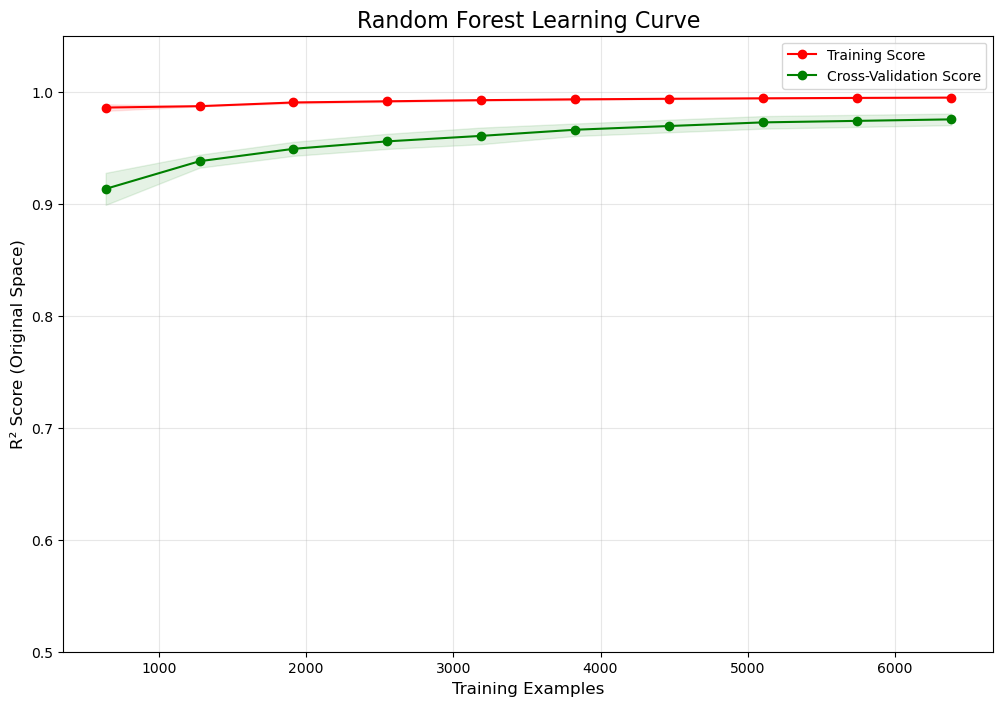


Learning Curve Diagnostics:
Final Training R²: 0.9948
Final Validation R²: 0.9753
Performance Gap: 0.0194
--> Well-generalized model (small gap)
--> Adding more data will likely improve results


In [25]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def custom_r2_scorer(estimator, X, y_trans):
    """Calculate R² in original target space"""
    y_pred_trans = estimator.predict(X)
    y_orig = inverse_transform(y_trans)
    y_pred_orig = inverse_transform(y_pred_trans)
    return r2_score(y_orig, y_pred_orig)

train_sizes, train_scores, val_scores = learning_curve(
    estimator=tuned_rf,
    X=X_train,
    y=y_train_trans,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 intervals
    cv=5,  # 5-fold cross-validation
    scoring=custom_r2_scorer,
    n_jobs=-1,
    verbose=1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(12, 8))
plt.title("Random Forest Learning Curve", fontsize=16)
plt.xlabel("Training Examples", fontsize=12)
plt.ylabel("R² Score (Original Space)", fontsize=12)
plt.ylim(0.5, 1.05)  # Adjust based on your R² range

# Plot performance bands
plt.fill_between(
    train_sizes,
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.1,
    color="r"
)
plt.fill_between(
    train_sizes,
    val_mean - val_std,
    val_mean + val_std,
    alpha=0.1,
    color="g"
)

# Plot mean performance lines
plt.plot(
    train_sizes,
    train_mean,
    'o-',
    color="r",
    label="Training Score"
)
plt.plot(
    train_sizes,
    val_mean,
    'o-',
    color="g",
    label="Cross-Validation Score"
)

plt.legend(loc="best")
plt.grid(True, alpha=0.3)
plt.savefig("random_forest_learning_curve.png", dpi=300)
plt.show()


final_train_score = train_mean[-1]
final_val_score = val_mean[-1]
gap = final_train_score - final_val_score

print("\n" + "="*50)
print("Learning Curve Diagnostics:")
print(f"Final Training R²: {final_train_score:.4f}")
print(f"Final Validation R²: {final_val_score:.4f}")
print(f"Performance Gap: {gap:.4f}")

if gap > 0.1:
    print("--> Significant overfitting detected (gap > 0.1)")
    print("Recommendations:")
    print("- Increase regularization (max_depth, min_samples_split)")
    print("- Reduce model complexity")
    print("- Feature selection to remove noise")
elif gap < 0.05:
    print("--> Well-generalized model (small gap)")
else:
    print("--> Moderate overfitting present")

if val_mean[-1] < val_mean[-2]:
    print("--> Adding more data may NOT improve performance")
else:
    print("--> Adding more data will likely improve results")
print("="*50)

In [34]:
joblib.dump(tuned_rf, "../../../models/random_forest/random_forest_model_v2.joblib")

['../../../models/random_forest/random_forest_model_v2.joblib']

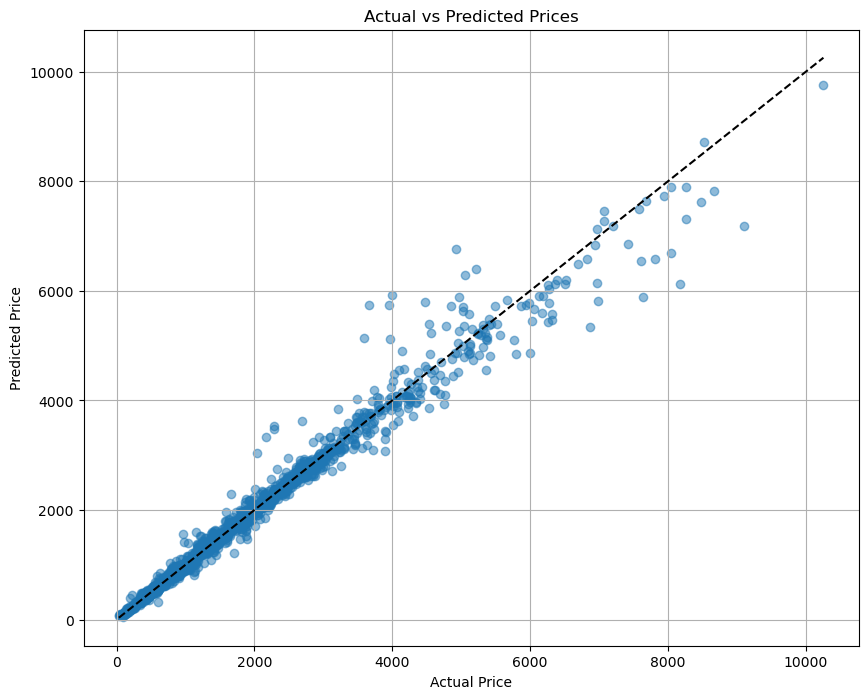

In [27]:
# Predict on test set
y_pred_test_trans = tuned_rf.predict(X_test)
y_pred_test = inverse_transform(y_pred_test_trans)
y_test_actual = inverse_transform(y_test_trans)

# Plot actual vs predicted
def plot_actual_vs_predicted(y_true, y_pred):
    plt.figure(figsize=(10, 8))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], 
             [y_true.min(), y_true.max()], 'k--')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Prices')
    plt.grid(True)
    plt.savefig("rf_actual_vs_predicted.png")
    plt.show()

plot_actual_vs_predicted(y_test_actual, y_pred_test)

In [28]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 1500),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', 0.7, 0.8, 0.9]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
    }
    # Only set max_samples if bootstrap is True
    if params['bootstrap']:
        params['max_samples'] = trial.suggest_float('max_samples', 0.6, 0.95)
    else:
        params['max_samples'] = None

    model = RandomForestRegressor(**params, random_state=42, n_jobs=-1)
    score = cross_val_score(
        model, 
        X_train, 
        y_train_trans, 
        cv=5, 
        scoring='r2', 
        n_jobs=-1
    ).mean()
    return score

print("\nStarting Optuna optimization...")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2025-06-25 23:23:04,507] A new study created in memory with name: no-name-c26450bc-44a7-461d-bbe2-7c7c10f730f5



Starting Optuna optimization...


[I 2025-06-25 23:23:22,458] Trial 0 finished with value: 0.9816263237343741 and parameters: {'n_estimators': 505, 'max_depth': 27, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 0.9, 'bootstrap': True, 'max_samples': 0.8635748071069125}. Best is trial 0 with value: 0.9816263237343741.
[I 2025-06-25 23:24:36,421] Trial 1 finished with value: 0.9868053342142478 and parameters: {'n_estimators': 1273, 'max_depth': 38, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_features': 0.9, 'bootstrap': False}. Best is trial 1 with value: 0.9868053342142478.
[I 2025-06-25 23:25:02,573] Trial 2 finished with value: 0.9728035052842362 and parameters: {'n_estimators': 995, 'max_depth': 44, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': 0.8, 'bootstrap': True, 'max_samples': 0.7922765733225124}. Best is trial 1 with value: 0.9868053342142478.
[I 2025-06-25 23:25:05,757] Trial 3 finished with value: 0.9577485572458405 and parameters: {'n_estimators': 553, 'max_depth':

In [29]:
# Create optimized model
optimized_params = study.best_params
optimized_rf = RandomForestRegressor(**optimized_params, random_state=42, n_jobs=-1)
optimized_rf.fit(X_train, y_train_trans)

RandomForestRegressor(bootstrap=False, max_depth=24, max_features=0.7,
                      min_samples_split=4, n_estimators=1357, n_jobs=-1,
                      random_state=42)

In [30]:
# Final evaluation function
def evaluate_model(model, X, y_true_trans):
    y_pred_trans = model.predict(X)
    y_pred = inverse_transform(y_pred_trans)
    y_true = inverse_transform(y_true_trans)
    
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-8))) * 100
    
    print(f"R²: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"Avg Price: {y_true.mean():.2f}")
    
    return y_pred

In [31]:
# Evaluate on test set
print("\nOptimized Random Forest Performance:")
y_pred_optimized = evaluate_model(optimized_rf, X_test, y_test_trans)


Optimized Random Forest Performance:
R²: 0.9791
MAE: 89.92
MAPE: 5.64%
Avg Price: 1741.45


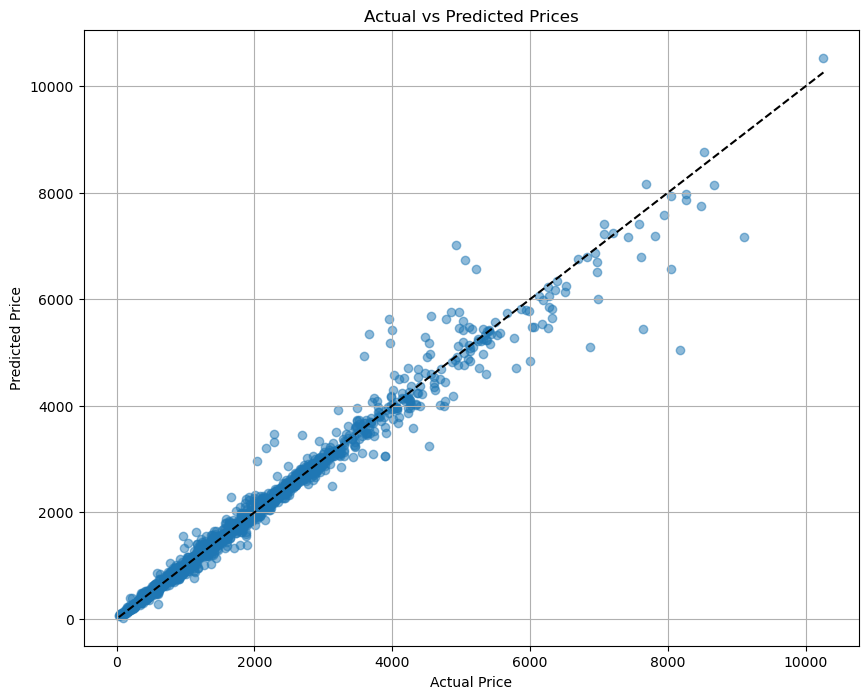

In [32]:
def plot_actual_vs_predicted(y_true, y_pred):
    plt.figure(figsize=(10, 8))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], 
             [y_true.min(), y_true.max()], 'k--')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Prices')
    plt.grid(True)
    plt.savefig("rf_actual_vs_predicted.png")
    plt.show()

y_test_actual = inverse_transform(y_test_trans)
plot_actual_vs_predicted(y_test_actual, y_pred_optimized)

[learning_curve] Training set sizes: [ 638 1276 1914 2552 3191 3829 4467 5105 5743 6382]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.3min finished


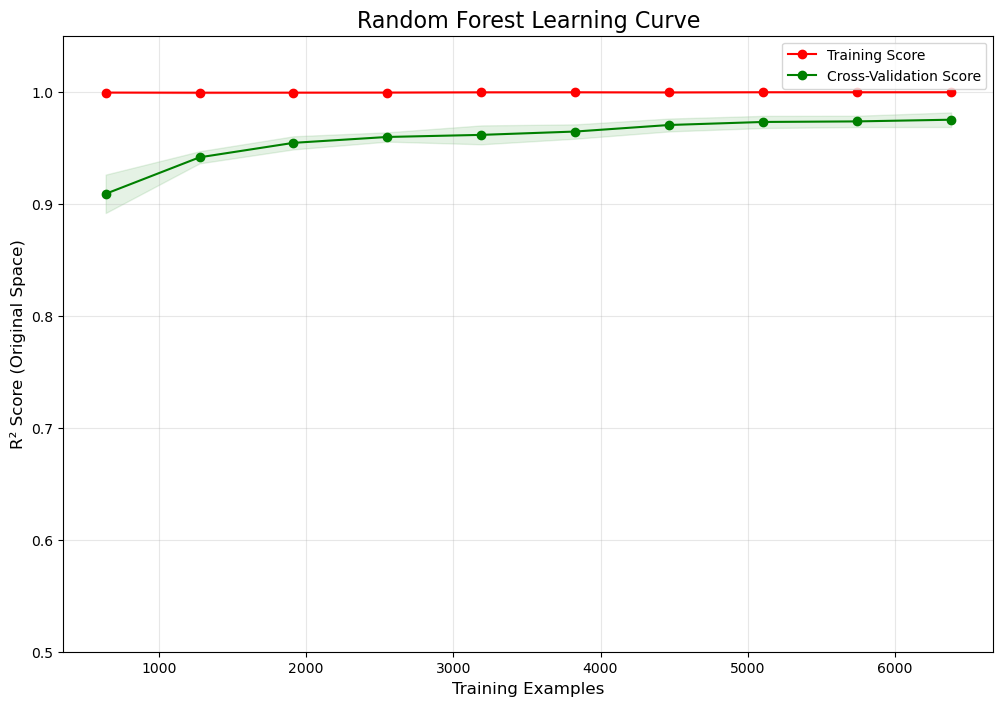


Learning Curve Diagnostics:
Final Training R²: 0.9996
Final Validation R²: 0.9750
Performance Gap: 0.0245
--> Well-generalized model (small gap)
--> Adding more data will likely improve results


In [33]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def custom_r2_scorer(estimator, X, y_trans):
    """Calculate R² in original target space"""
    y_pred_trans = estimator.predict(X)
    y_orig = inverse_transform(y_trans)
    y_pred_orig = inverse_transform(y_pred_trans)
    return r2_score(y_orig, y_pred_orig)

train_sizes, train_scores, val_scores = learning_curve(
    estimator=optimized_rf,
    X=X_train,
    y=y_train_trans,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 intervals
    cv=5,  # 5-fold cross-validation
    scoring=custom_r2_scorer,
    n_jobs=-1,
    verbose=1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(12, 8))
plt.title("Random Forest Learning Curve", fontsize=16)
plt.xlabel("Training Examples", fontsize=12)
plt.ylabel("R² Score (Original Space)", fontsize=12)
plt.ylim(0.5, 1.05)  # Adjust based on your R² range

# Plot performance bands
plt.fill_between(
    train_sizes,
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.1,
    color="r"
)
plt.fill_between(
    train_sizes,
    val_mean - val_std,
    val_mean + val_std,
    alpha=0.1,
    color="g"
)

# Plot mean performance lines
plt.plot(
    train_sizes,
    train_mean,
    'o-',
    color="r",
    label="Training Score"
)
plt.plot(
    train_sizes,
    val_mean,
    'o-',
    color="g",
    label="Cross-Validation Score"
)

plt.legend(loc="best")
plt.grid(True, alpha=0.3)
plt.savefig("random_forest_learning_curve.png", dpi=300)
plt.show()


final_train_score = train_mean[-1]
final_val_score = val_mean[-1]
gap = final_train_score - final_val_score

print("\n" + "="*50)
print("Learning Curve Diagnostics:")
print(f"Final Training R²: {final_train_score:.4f}")
print(f"Final Validation R²: {final_val_score:.4f}")
print(f"Performance Gap: {gap:.4f}")

if gap > 0.1:
    print("--> Significant overfitting detected (gap > 0.1)")
    print("Recommendations:")
    print("- Increase regularization (max_depth, min_samples_split)")
    print("- Reduce model complexity")
    print("- Feature selection to remove noise")
elif gap < 0.05:
    print("--> Well-generalized model (small gap)")
else:
    print("--> Moderate overfitting present")

if val_mean[-1] < val_mean[-2]:
    print("--> Adding more data may NOT improve performance")
else:
    print("--> Adding more data will likely improve results")
print("="*50)